In [9]:
import seaborn as sns
import pylab

pylab.rcParams['figure.figsize'] = 15, 8

In [2]:
from ring import RingNetwork

In [3]:
parameters = {
    'D': 0.5,           # internal noise intensity
    'inhibitory_weight': -12,          # E->I synaptic weight
    'excitatory_weight': 30,           # E->E recurrent synaptic weight
    'T': 0.2,           # duration of incoming stimuli, sec
    'C': 10.0,           # amplitude of incoming stimuli, a.u.
    'freq': 4,          # stimulus Poisson rate, Hz
    'tau_r': 0.01,      # readout time constant, sec
    'tau': 0.01,        # firing rate decay time constant, sec
    'tau_n': 0.1,       # noise correlation time constant, sec
    'tau_rec': 0.1,     # time constant for recovery of synaptic resourses, sec
    'N': 100,           # number of neural populations in the network
}

In [11]:
net = RingNetwork(U=0.9,
                  model_parameters=parameters)

In [12]:
net.integrate(simulation_time=50.0)

100%|██████████████████████████████████████████| 24999/24999 [00:19<00:00, 1289.41it/s]


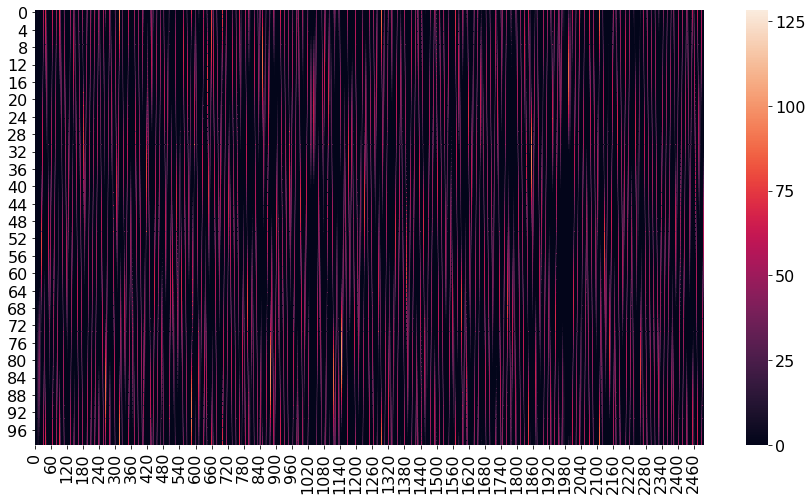

In [13]:
sns.heatmap(net.m_series.T)

C:\Users\ilazarev\AppData\Local\Continuum\anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


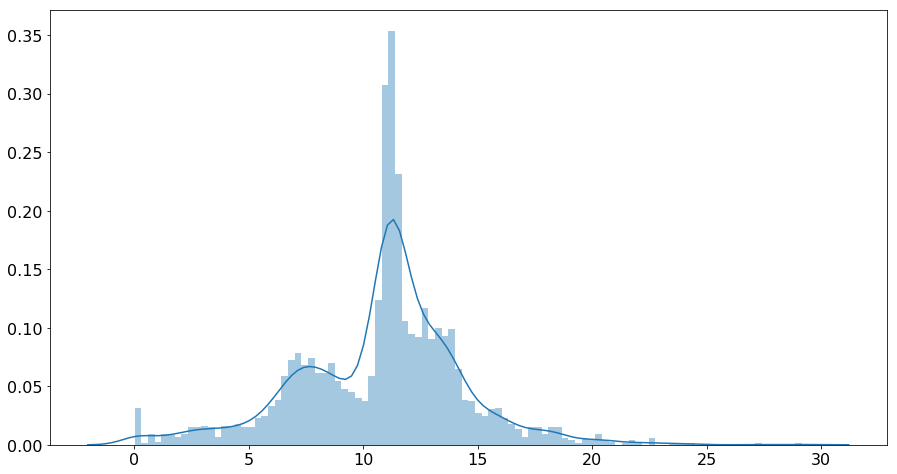

In [22]:
# sns.tsplot(net.m_series.mean(axis=1));
sns.distplot(net.m_series.mean(axis=1), 
             bins=100)

In [35]:
parameters['w_inh'] = -1.0
parameters['I0_inh'] = -10.0

In [48]:
net = RingNetwork(U=0.3,
                  model_parameters=parameters)

net.interneuron_model = 'static_linear'

In [49]:
net.integrate(simulation_time=10.0,
              check_readouts=True)

100%|█████████████████████████████████████████████| 4999/4999 [00:15<00:00, 326.75it/s]


In [50]:
#sns.heatmap(net.inh_gain_function(np.dot(0*net.W - net.p.inhibitory_weight / net.N, net.U * net.x_series.T * net.m_series.T) +
#                        net.p.I0_inh))

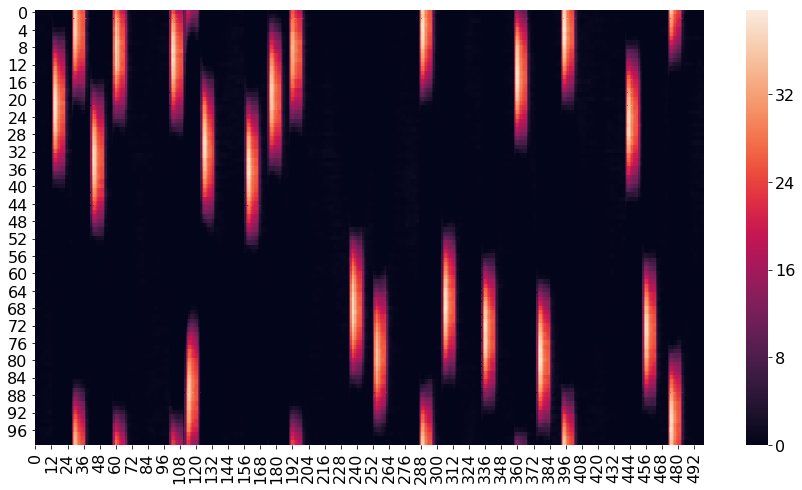

In [51]:
sns.heatmap(net.m_series.T)

In [52]:
net.I_series

AttributeError: 'RingNetwork' object has no attribute 'I_series'